In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
!ls /kaggle/input/food41/images/

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheese_plate	    grilled_salmon	     risotto
cheesecake	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [3]:
# from tqdm.notebook import tqdm # For fancy looping
import random # Generating random numbers or choosing random item from sequence
import shutil # Copying files from one folder to another
import os # For intarcting with oprating system information
import json # To acess json files

In [4]:
#Listing directoris in images but we will not use them all
os.listdir("/kaggle/input/food41/images/")

['macarons',
 'french_toast',
 'lobster_bisque',
 'prime_rib',
 'pork_chop',
 'guacamole',
 'baby_back_ribs',
 'mussels',
 'beef_carpaccio',
 'poutine',
 'hot_and_sour_soup',
 'seaweed_salad',
 'foie_gras',
 'dumplings',
 'peking_duck',
 'takoyaki',
 'bibimbap',
 'falafel',
 'pulled_pork_sandwich',
 'lobster_roll_sandwich',
 'carrot_cake',
 'beet_salad',
 'panna_cotta',
 'donuts',
 'red_velvet_cake',
 'grilled_cheese_sandwich',
 'cannoli',
 'spring_rolls',
 'shrimp_and_grits',
 'clam_chowder',
 'omelette',
 'fried_calamari',
 'caprese_salad',
 'oysters',
 'scallops',
 'ramen',
 'grilled_salmon',
 'croque_madame',
 'filet_mignon',
 'hamburger',
 'spaghetti_carbonara',
 'miso_soup',
 'bread_pudding',
 'lasagna',
 'crab_cakes',
 'cheesecake',
 'spaghetti_bolognese',
 'cup_cakes',
 'creme_brulee',
 'waffles',
 'fish_and_chips',
 'paella',
 'macaroni_and_cheese',
 'chocolate_mousse',
 'ravioli',
 'chicken_curry',
 'caesar_salad',
 'nachos',
 'tiramisu',
 'frozen_yogurt',
 'ice_cream',
 'ris

In [5]:
# Listing files in macarons folder
os.listdir("/kaggle/input/food41/images/" + 'macarons')

['2428554.jpg',
 '3842133.jpg',
 '1963752.jpg',
 '1075.jpg',
 '2094416.jpg',
 '397954.jpg',
 '124381.jpg',
 '407716.jpg',
 '2844220.jpg',
 '1736833.jpg',
 '1573041.jpg',
 '2128858.jpg',
 '884964.jpg',
 '397941.jpg',
 '397948.jpg',
 '113029.jpg',
 '852762.jpg',
 '1849077.jpg',
 '2566480.jpg',
 '3191653.jpg',
 '3642322.jpg',
 '411182.jpg',
 '773688.jpg',
 '3632637.jpg',
 '2505199.jpg',
 '1878394.jpg',
 '2932129.jpg',
 '471095.jpg',
 '2120033.jpg',
 '2813919.jpg',
 '910896.jpg',
 '2539460.jpg',
 '2309778.jpg',
 '1569300.jpg',
 '1759631.jpg',
 '3658494.jpg',
 '1010087.jpg',
 '989810.jpg',
 '2616376.jpg',
 '3864608.jpg',
 '633941.jpg',
 '1962503.jpg',
 '3917914.jpg',
 '2799017.jpg',
 '294614.jpg',
 '2059656.jpg',
 '1876301.jpg',
 '1485562.jpg',
 '1373808.jpg',
 '2617154.jpg',
 '2432777.jpg',
 '1288619.jpg',
 '845188.jpg',
 '3253580.jpg',
 '1447451.jpg',
 '2467066.jpg',
 '2107351.jpg',
 '356293.jpg',
 '3503443.jpg',
 '2546580.jpg',
 '3443712.jpg',
 '980106.jpg',
 '669234.jpg',
 '570324.jpg',

In [4]:
# Getting all label to files from provided json files
def get_labels(label_path):
    with open(label_path) as f:
        return json.load(f)

train_labels = get_labels(r"/kaggle/input/food41/meta/meta/train.json")
test_labels = get_labels(r"/kaggle/input/food41/meta/meta/test.json")

In [7]:
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


In [8]:
train_labels["churros"][0]

'churros/1004234'

## Creating target class folders and moving images there

In [5]:
def copy_images(parent_folder, new_subset, dataset, target_labels):
    # Getting appropriate labels
    print(f"\nUsing {dataset} labels...")
    labels = get_labels("/kaggle/input/food41/meta/meta/" + dataset + ".json")
    
    for i in target_labels:
        os.makedirs("/kaggle/working"+"/"+new_subset+"/"+dataset+"/"+i+"/", exist_ok=True)
        
        # Go through labels and get appropriate classes
        images_moved = []
        for j in labels[i]:
            og_path = parent_folder+"/food41/images/"+j+".jpg"
            new_path = "/kaggle/working"+"/"+new_subset+"/"+dataset+"/"+j+".jpg"
            shutil.copy2(og_path, new_path)
            images_moved.append(new_path)
        print(f"Copied {len(images_moved)} images from {dataset} dataset {i} class...")

## Creating function to get random sample of images

* Well training and testing data are already provided separately or we can use this function

In [6]:
def get_percent_images(target_dir, new_dir, sample_amount=0.1, random_state=42):
    random.seed(random_state)
    
    images = [{dir_name: os.listdir(target_dir + dir_name)} for dir_name in os.listdir(target_dir)]
    
    for i in images:
        for k, v in i.items():
            # How many images to sample?
            sample_no = round(int(len(v)*sample_amount))
            print(f"There are {len(v)} total images in '{target_dir + k}' so we're going to copy {sample_no} to the new directory.")
            print(f"Getting {sample_no} random images for {k}...")
            random_images = random.sample(v, sample_no)
            
            # Make new dir for each key
            new_target_dir = new_dir + k
            print(f"Making dir:{new_target_dir}")
            os.makedirs(new_target_dir, exist_ok=True)
            
            # Keep track of images moved
            images_moved = []
            
            # Create file path for original images and new file target
            print(f"Copying images form: {target_dir}\n\t\t to: {new_target_dir}/\n")
            for file_name in random_images:
                og_path = target_dir + k + "/" + file_name
                new_path = new_target_dir+"/"+file_name
                
                shutil.copy2(og_path, new_path)
                images_moved.append(new_path)
            
            assert len(os.listdir(new_target_dir)) == sample_no
            assert len(images_moved) == sample_no

## Making binary data (pizza and steak)

Two classes: steak and pizza.

In [7]:
parent_folder = "/kaggle/input"
target_labels = ["steak", "pizza"]
new_subset = "pizza_steak"
datasets = ["train", "test"]

for i in datasets:
    copy_images(parent_folder = parent_folder,
               new_subset=new_subset,
               dataset=i,
               target_labels=target_labels)


Using train labels...
Copied 750 images from train dataset steak class...
Copied 750 images from train dataset pizza class...

Using test labels...
Copied 250 images from test dataset steak class...
Copied 250 images from test dataset pizza class...


In [8]:
# So we created 750 for training and 250 for testing, let's check
print("Number of images in training set:", len(os.listdir("/kaggle/working/pizza_steak/train/steak")))
print("Number of images in testing set:", len(os.listdir("/kaggle/working/pizza_steak/test/steak")))

Number of images in training set: 750
Number of images in testing set: 250


In [9]:
# Checking whether the images in training and testing dataset are different or not.
train_files = set(os.listdir("/kaggle/working/pizza_steak/train/steak"))
test_files = set(os.listdir("/kaggle/working/pizza_steak/test/steak"))

# If there is any same file rise an error
assert len(train_files.intersection(test_files)) == 0

In [10]:
train_files = set(os.listdir("/kaggle/working/pizza_steak/train/pizza"))
test_files = set(os.listdir("/kaggle/working/pizza_steak/test/pizza"))

assert len(train_files.intersection(test_files)) == 0

## Make 10% binary class dataset

In [19]:
!ls /kaggle/working/pizza_steak

test  train


In [11]:
get_percent_images(target_dir="/kaggle/working/pizza_steak/train/",
                  new_dir="/kaggle/working/pizza_steak_10_percent/train",
                  sample_amount=0.1,
                  random_state=42)

There are 750 total images in '/kaggle/working/pizza_steak/train/steak' so we're going to copy 75 to the new directory.
Getting 75 random images for steak...
Making dir:/kaggle/working/pizza_steak_10_percent/trainsteak
Copying images form: /kaggle/working/pizza_steak/train/
		 to: /kaggle/working/pizza_steak_10_percent/trainsteak/

There are 750 total images in '/kaggle/working/pizza_steak/train/pizza' so we're going to copy 75 to the new directory.
Getting 75 random images for pizza...
Making dir:/kaggle/working/pizza_steak_10_percent/trainpizza
Copying images form: /kaggle/working/pizza_steak/train/
		 to: /kaggle/working/pizza_steak_10_percent/trainpizza/



In [12]:
get_percent_images(target_dir="/kaggle/working/pizza_steak/train/",
                  new_dir="/kaggle/working/pizza_steak_1_percent/train",
                  sample_amount=0.01,
                  random_state=42)

There are 750 total images in '/kaggle/working/pizza_steak/train/steak' so we're going to copy 7 to the new directory.
Getting 7 random images for steak...
Making dir:/kaggle/working/pizza_steak_1_percent/trainsteak
Copying images form: /kaggle/working/pizza_steak/train/
		 to: /kaggle/working/pizza_steak_1_percent/trainsteak/

There are 750 total images in '/kaggle/working/pizza_steak/train/pizza' so we're going to copy 7 to the new directory.
Getting 7 random images for pizza...
Making dir:/kaggle/working/pizza_steak_1_percent/trainpizza
Copying images form: /kaggle/working/pizza_steak/train/
		 to: /kaggle/working/pizza_steak_1_percent/trainpizza/



In [13]:
binary_test = "/kaggle/working/pizza_steak/test/"
shutil.copytree(binary_test, "/kaggle/working/pizza_10_steak/test/")
shutil.copytree(binary_test, "/kaggle/working/pizza_1_steak/test/")

'/kaggle/working/pizza_1_steak/test/'

## Visualizing Images

In [14]:
import sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

/kaggle/input/food41/images/chicken_curry/2000064.jpg


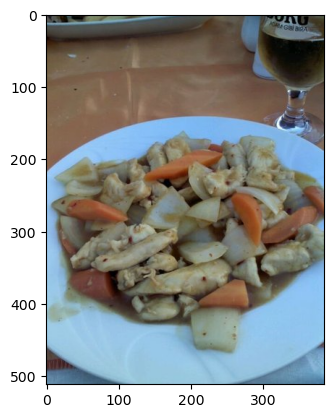

In [15]:
# Printing random images from dataset to visualize dataset
target_dir = "/kaggle/input/food41/images/"
target_class = "chicken_curry"
target_path = target_dir+target_class
file_names = os.listdir(target_path)
target_img = target_path + "/" + random.sample(file_names, 1)[0]
print(target_img)

img = mpimg.imread(target_img)
plt.imshow(img);

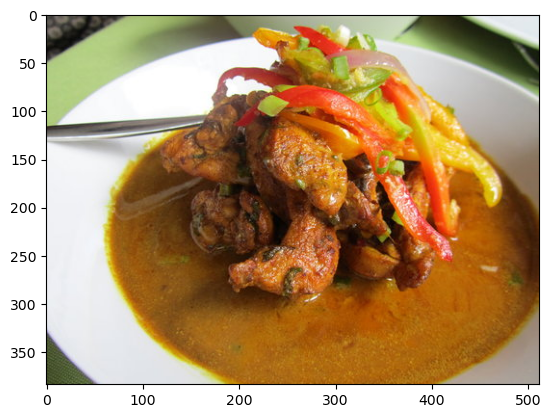

In [16]:
img = mpimg.imread("/kaggle/input/food41/images/chicken_curry/828808.jpg")
plt.imshow(img)

In [17]:
# To plotting three random images
def view_three_images(target_dir, target_class):
    target_path = target_dir + target_class
    file_name = os.listdir(target_path)
    target_images = random.sample(file_name, 3)
    
#     plt.figure(figsize=(15, 6))
    for i, img in enumerate(target_images):
        img_path = target_path+"/"+img
        plt.subplot(2, 2, i+1)
        plt.imshow(mpimg.imread(img_path))
        plt.title(target_class)
        plt.axis("off")

In [27]:
view_three_images(target_dir="/kaggle/input/food41/images/",
                 target_class="pizza")

## Making 10 class dataset

In [18]:
!ls /kaggle/input/food41/meta/meta

classes.txt  labels.txt  test.json  test.txt  train.json  train.txt


In [19]:
# Getting labels of food from classes.txt file
classes = []
i = 1
with open("/kaggle/input/food41/meta/meta/classes.txt") as f:
    for line in f.readlines():
        if i < 3:
            print(line)
            i += 1
        classes.append(line.split("\n")[0])

apple_pie

baby_back_ribs



In [20]:
# Just printing all labels
print(classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [21]:
# We will be using this 10 food classes to build model on
ten_classes = ["pizza", "steak", "sushi", "ramen", "chicken_wings",
               "chicken_curry", "hamburger", "fried_rice", "grilled_salmon", 
               "ice_cream"]
len(ten_classes)

10

In [22]:
parent_folder = "/kaggle/input"
new_subset = "10_food_classes"
datasets = ["train", "test"]

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                target_labels=ten_classes)


Using train labels...
Copied 750 images from train dataset pizza class...
Copied 750 images from train dataset steak class...
Copied 750 images from train dataset sushi class...
Copied 750 images from train dataset ramen class...
Copied 750 images from train dataset chicken_wings class...
Copied 750 images from train dataset chicken_curry class...
Copied 750 images from train dataset hamburger class...
Copied 750 images from train dataset fried_rice class...
Copied 750 images from train dataset grilled_salmon class...
Copied 750 images from train dataset ice_cream class...

Using test labels...
Copied 250 images from test dataset pizza class...
Copied 250 images from test dataset steak class...
Copied 250 images from test dataset sushi class...
Copied 250 images from test dataset ramen class...
Copied 250 images from test dataset chicken_wings class...
Copied 250 images from test dataset chicken_curry class...
Copied 250 images from test dataset hamburger class...
Copied 250 images fr

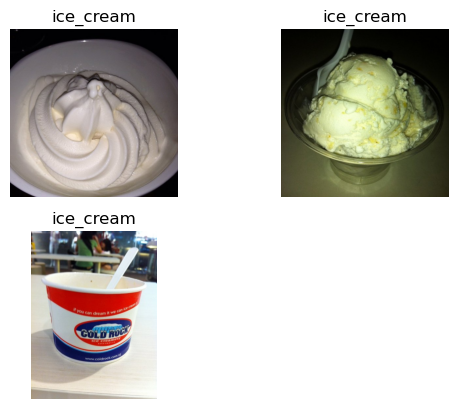

In [23]:
view_three_images(target_dir="/kaggle/input/food41/images/", 
                  target_class="ice_cream")

In [24]:
get_percent_images(target_dir="/kaggle/working/10_food_classes/train/",
                   new_dir="/kaggle/working/10_food_classes_10_percent/train/",
                   sample_amount=0.1, # 1%
                   random_state=42)

There are 750 total images in '/kaggle/working/10_food_classes/train/steak' so we're going to copy 75 to the new directory.
Getting 75 random images for steak...
Making dir:/kaggle/working/10_food_classes_10_percent/train/steak
Copying images form: /kaggle/working/10_food_classes/train/
		 to: /kaggle/working/10_food_classes_10_percent/train/steak/

There are 750 total images in '/kaggle/working/10_food_classes/train/ice_cream' so we're going to copy 75 to the new directory.
Getting 75 random images for ice_cream...
Making dir:/kaggle/working/10_food_classes_10_percent/train/ice_cream
Copying images form: /kaggle/working/10_food_classes/train/
		 to: /kaggle/working/10_food_classes_10_percent/train/ice_cream/

There are 750 total images in '/kaggle/working/10_food_classes/train/chicken_wings' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_wings...
Making dir:/kaggle/working/10_food_classes_10_percent/train/chicken_wings
Copying images form: /kaggle

In [25]:
get_percent_images(target_dir="/kaggle/working/10_food_classes/train/",
                   new_dir="/kaggle/working/10_food_classes_1_percent/train/",
                   sample_amount=0.01, # 1%
                   random_state=42)

There are 750 total images in '/kaggle/working/10_food_classes/train/steak' so we're going to copy 7 to the new directory.
Getting 7 random images for steak...
Making dir:/kaggle/working/10_food_classes_1_percent/train/steak
Copying images form: /kaggle/working/10_food_classes/train/
		 to: /kaggle/working/10_food_classes_1_percent/train/steak/

There are 750 total images in '/kaggle/working/10_food_classes/train/ice_cream' so we're going to copy 7 to the new directory.
Getting 7 random images for ice_cream...
Making dir:/kaggle/working/10_food_classes_1_percent/train/ice_cream
Copying images form: /kaggle/working/10_food_classes/train/
		 to: /kaggle/working/10_food_classes_1_percent/train/ice_cream/

There are 750 total images in '/kaggle/working/10_food_classes/train/chicken_wings' so we're going to copy 7 to the new directory.
Getting 7 random images for chicken_wings...
Making dir:/kaggle/working/10_food_classes_1_percent/train/chicken_wings
Copying images form: /kaggle/working/10

In [26]:
ten_percent_test = "/kaggle/working/10_food_classes/test/"
shutil.copytree(ten_percent_test, "/kaggle/working/10_food_classes_10_percent/test/")
shutil.copytree(ten_percent_test, "/kaggle/working/10_food_classes_1_percent/test/")

'/kaggle/working/10_food_classes_1_percent/test/'

## Inspecting The Data

In [27]:
!ls /kaggle/working/pizza_steak/train/

pizza  steak


In [28]:
!ls /kaggle/working/pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [29]:
print(len(os.listdir("/kaggle/working/pizza_steak/train/steak/")))

750


In [30]:
!ls /kaggle/working/pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [31]:
print(len(os.listdir("/kaggle/working/pizza_steak/train/pizza")))

750


In [32]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/kaggle/working/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [33]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape: {img.shape}")
    return img

image shape: (384, 512, 3)


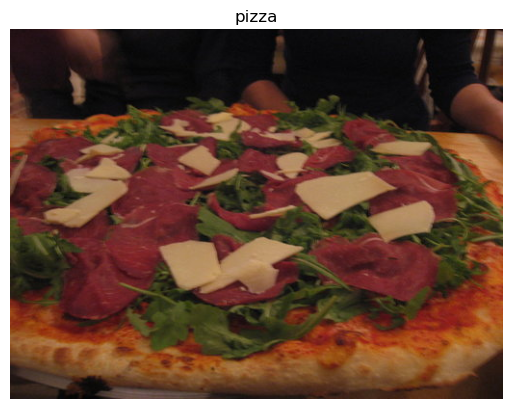

In [35]:
img = view_random_image(target_dir="/kaggle/working/pizza_steak/train/",
                       target_class="pizza")

## Trying Basic ANN Model

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preparing data for model
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/kaggle/working/pizza_steak/train/"
test_dir = "/kaggle/working/pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [38]:
# Set seed
tf.random.set_seed(42)

# Build basic model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 134ms/step - loss: 1.4695 - accuracy: 0.5180 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


* Our model accuracy is not good. It' only 50% it like our model is only guessing.

<Axes: >

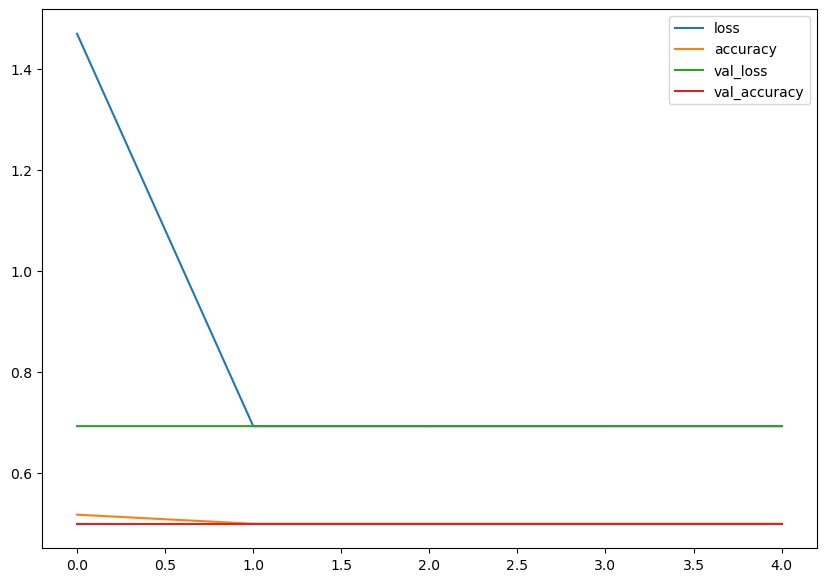

In [41]:
# Let's visualize what our model losses looks like
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [40]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_2 = model_2.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 271ms/step - loss: 3.2698 - accuracy: 0.6127 - val_loss: 0.5714 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 12s 248ms/step - loss: 0.5599 - accuracy: 0.7460 - val_loss: 0.5405 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 12s 249ms/step - loss: 0.6515 - accuracy: 0.7080 - val_loss: 0.5856 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 0.5799 - accuracy: 0.7640 - val_loss: 0.4684 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 12s 253ms/step - loss: 0.5334 - accuracy: 0.7780 - val_loss: 0.5851 - val_accuracy: 0.7220


* When we increase number of nurons in our model it look like our model accuarcy got better.

In [42]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))

<Axes: >

In [43]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


* There are total 15 million weights in our model

## Building basic CNN model

* Noe let's see how our basic CNN model will work on data.

In [44]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential as seq

In [46]:
model_3 = seq([
    Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",
           activation="relu",input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",optimizer=Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 82s 2s/step - loss: 0.7436 - accuracy: 0.5980 - val_loss: 0.4845 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 81s 2s/step - loss: 0.4615 - accuracy: 0.7947 - val_loss: 0.4010 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 81s 2s/step - loss: 0.3289 - accuracy: 0.8587 - val_loss: 0.3203 - val_accuracy: 0.8860
Epoch 4/5
47/47 [==============================] - 81s 2s/step - loss: 0.2392 - accuracy: 0.9147 - val_loss: 0.3204 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 81s 2s/step - loss: 0.1317 - accuracy: 0.9633 - val_loss: 0.4242 - val_accuracy: 0.8240


<Axes: >

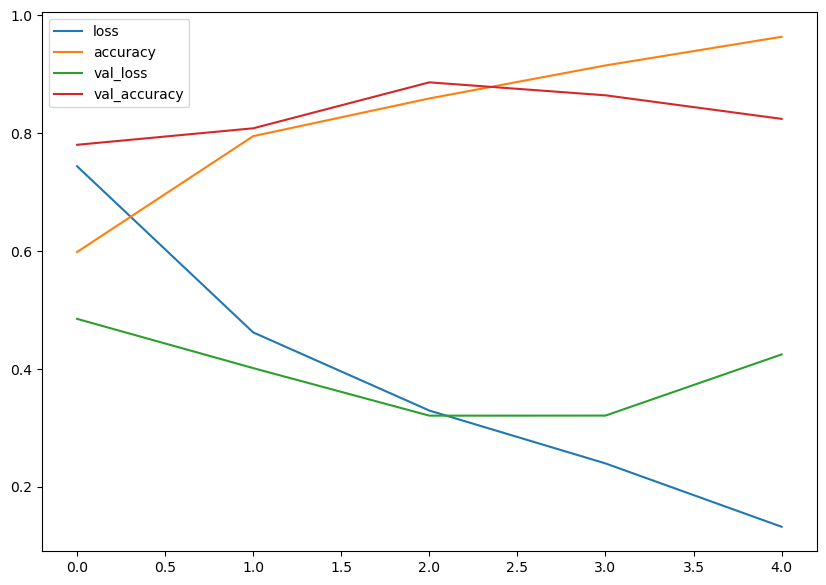

In [47]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [48]:
def plot_loss_curves(history):
    """
    Return separate loss curves for training and validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

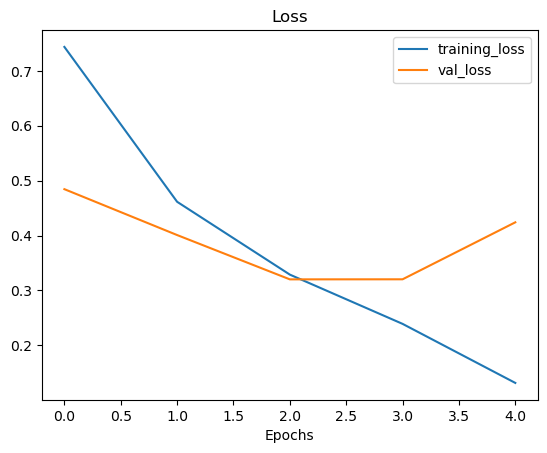

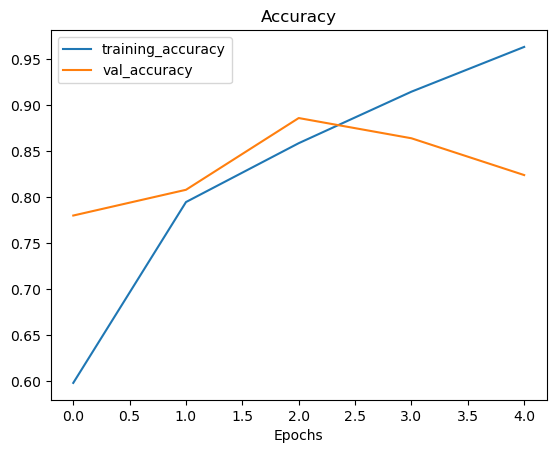

In [50]:
plot_loss_curves(history_3)

* When validation loss tends to increase the reason is most likly beacuase our data is overfitting.
* From below we can see that only with 477 thousand weights we got much better accuracy for CNN model

In [51]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# Adjusting Model parameters

In [52]:
model_4 = seq([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 32s 662ms/step - loss: 0.6220 - accuracy: 0.6633 - val_loss: 0.4847 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 31s 654ms/step - loss: 0.4972 - accuracy: 0.7647 - val_loss: 0.4160 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 31s 654ms/step - loss: 0.4535 - accuracy: 0.7993 - val_loss: 0.4041 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 31s 655ms/step - loss: 0.4456 - accuracy: 0.8053 - val_loss: 0.3818 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 31s 659ms/step - loss: 0.4208 - accuracy: 0.8193 - val_loss: 0.3811 - val_accuracy: 0.8520


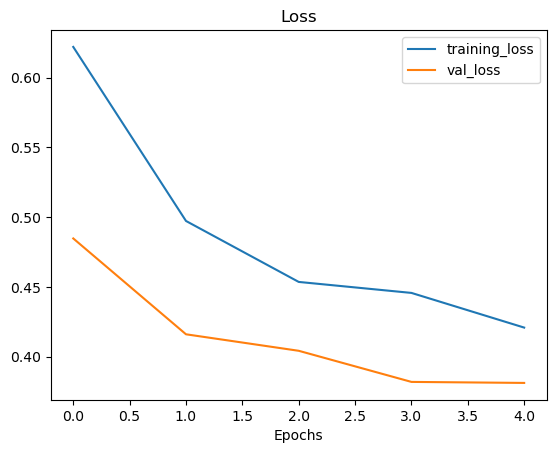

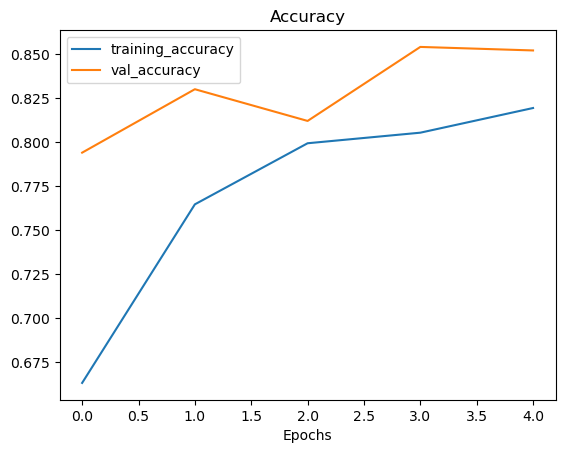

In [53]:
plot_loss_curves(history_4)

In [54]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

## Appling Data Augmentation to Improve Model

In [55]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [56]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [57]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

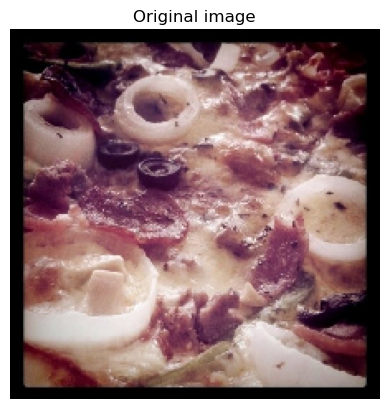

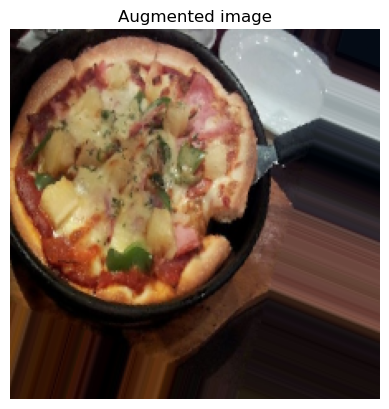

In [58]:
random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False);

* I kept shuffel to be true for better model building that way images are not the same but we can see how data is different from before.

In [59]:
# Create the model (same as model_4)
model_5 = seq([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 40s 828ms/step - loss: 0.6386 - accuracy: 0.6327 - val_loss: 0.4832 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 40s 837ms/step - loss: 0.5202 - accuracy: 0.7433 - val_loss: 0.4670 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 39s 828ms/step - loss: 0.4971 - accuracy: 0.7707 - val_loss: 0.3536 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 39s 824ms/step - loss: 0.4613 - accuracy: 0.7893 - val_loss: 0.3264 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 39s 814ms/step - loss: 0.4773 - accuracy: 0.7747 - val_loss: 0.4320 - val_accuracy: 0.7860


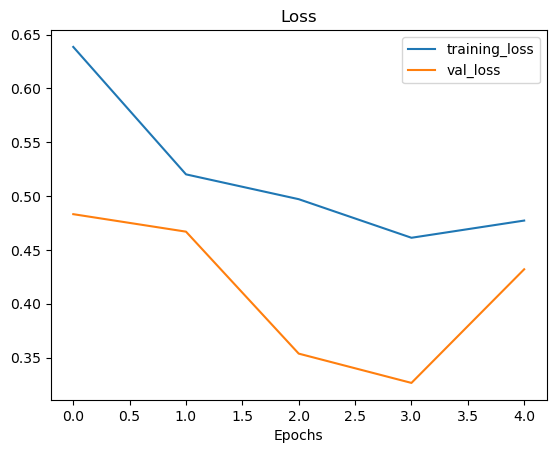

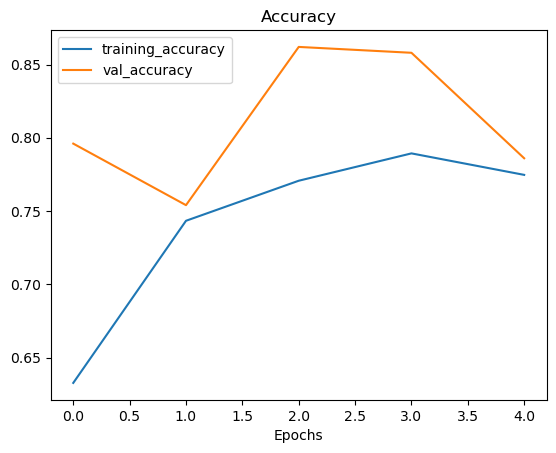

In [60]:
plot_loss_curves(history_5)

In [61]:
model_6 = seq([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 73s 2s/step - loss: 0.6457 - accuracy: 0.6460 - val_loss: 0.4667 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 72s 2s/step - loss: 0.5425 - accuracy: 0.7340 - val_loss: 0.4192 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 72s 2s/step - loss: 0.5112 - accuracy: 0.7447 - val_loss: 0.3647 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 72s 2s/step - loss: 0.4856 - accuracy: 0.7727 - val_loss: 0.3524 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 71s 1s/step - loss: 0.4579 - accuracy: 0.7847 - val_loss: 0.3713 - val_accuracy: 0.8360


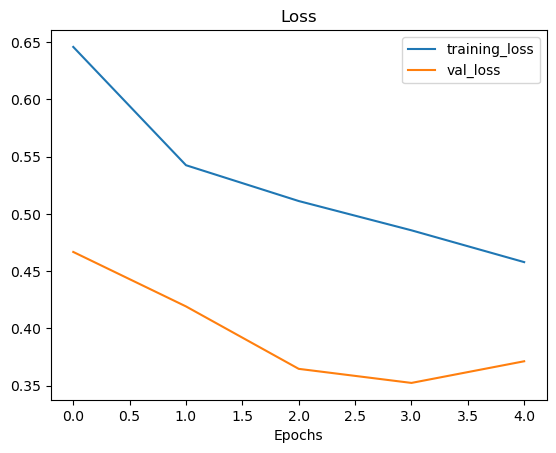

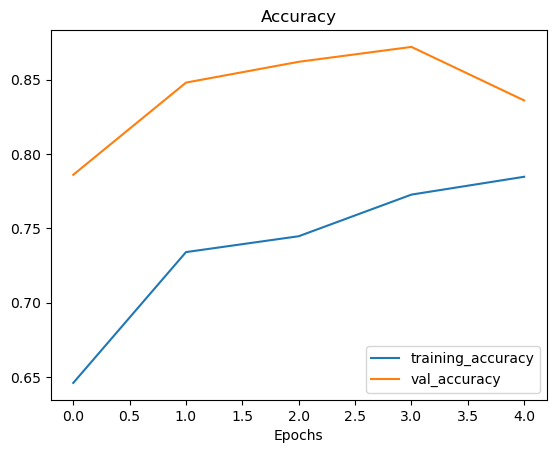

In [62]:
plot_loss_curves(history_6)

In [63]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

* We can see that how much our model is improved.

--2023-06-07 09:43:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-06-07 09:43:22 (32.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



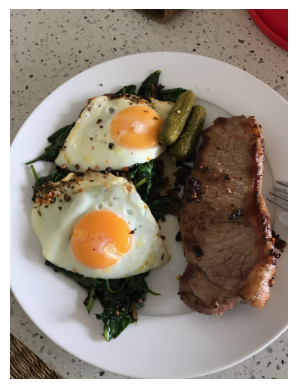

In [79]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("/kaggle/working/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [80]:
steak.shape

(4032, 3024, 3)

In [81]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.
    return img

In [83]:
steak = load_and_prep_image("/kaggle/working/03-steak.jpeg")

print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0)
print(f"Shape after new dimension: {steak.shape}")

pred = model_6.predict(steak)
pred

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)
1/1 [==============================] - 0s 35ms/step


array([[0.8789211]], dtype=float32)

In [77]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [78]:
pizza_1 = load_and_prep_image('/kaggle/input/food-image-checking/pizza_image_3.jpg')

print(f"Shape before new dimension: {pizza.shape}")
pizza_1 = tf.expand_dims(pizza, axis=0)
print(f"Shape after new dimension: {pizza.shape}")

pred_1 = model_6.predict(pizza)
pred_class_1 = class_names[int(tf.round(pred_1)[0][0])]
pred_class_1

Shape before new dimension: (1, 224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)
1/1 [==============================] - 0s 34ms/step


'steak'

In [84]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [85]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [130]:
def pred_and_plot(model, filename, class_name):
    img = load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred)[0][0])]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 35ms/step


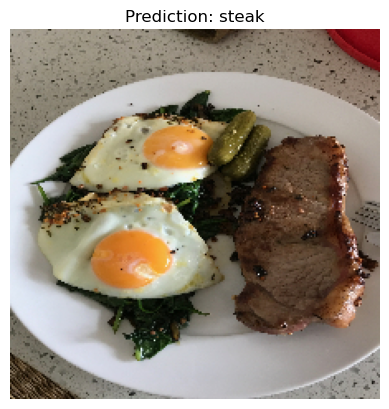

In [88]:
pred_and_plot(model_6, "/kaggle/working/03-steak.jpeg", class_names)

In [89]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_6, "/kaggle/working/03-pizza-dad.jpeg", class_names)

--2023-06-07 09:45:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-06-07 09:45:37 (39.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 37ms/step


## Multi-class Classification

### 1. Preparing Data

In [90]:
train_dir = "/kaggle/working/10_food_classes/train/"
test_dir = "/kaggle/working/10_food_classes/test/"

In [128]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [92]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

image shape: (512, 507, 3)


### 2. Preprocessing Data

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Creating Model

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_7.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fitting Model

In [100]:
histry_7 = model_7.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 329s 1s/step - loss: 2.1447 - accuracy: 0.2163 - val_loss: 1.9939 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 327s 1s/step - loss: 1.8478 - accuracy: 0.3672 - val_loss: 1.8675 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 327s 1s/step - loss: 1.4596 - accuracy: 0.5125 - val_loss: 1.9930 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 327s 1s/step - loss: 0.8530 - accuracy: 0.7187 - val_loss: 2.6567 - val_accuracy: 0.3048
Epoch 5/5
235/235 [==============================] - 327s 1s/step - loss: 0.3519 - accuracy: 0.8963 - val_loss: 3.4516 - val_accuracy: 0.2828


### 5. Evaluating Model

In [101]:
model_7.evaluate(test_data)

79/79 [==============================] - 29s 362ms/step - loss: 3.4516 - accuracy: 0.2828


[3.4515609741210938, 0.28279998898506165]

In [102]:
plot_loss_curves(histry_7)

### 6. Adjusting Parameters

In [103]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_8.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_8 = model_8.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 142s 602ms/step - loss: 2.2064 - accuracy: 0.2324 - val_loss: 2.0064 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 141s 598ms/step - loss: 1.8037 - accuracy: 0.3876 - val_loss: 1.9310 - val_accuracy: 0.3212
Epoch 3/5
235/235 [==============================] - 142s 603ms/step - loss: 1.2896 - accuracy: 0.5829 - val_loss: 2.0712 - val_accuracy: 0.3076
Epoch 4/5
235/235 [==============================] - 141s 600ms/step - loss: 0.7573 - accuracy: 0.7687 - val_loss: 2.5114 - val_accuracy: 0.3100
Epoch 5/5
235/235 [==============================] - 142s 603ms/step - loss: 0.3996 - accuracy: 0.8904 - val_loss: 3.0356 - val_accuracy: 0.2756


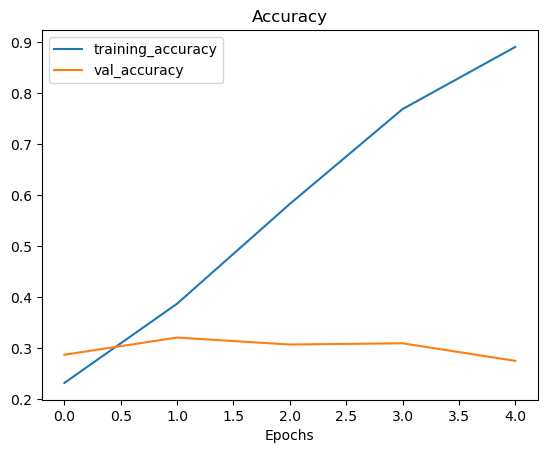

In [104]:
plot_loss_curves(history_8)

### 8. Applying Data Augmentation

In [105]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [123]:
model_9 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (same setup as used for model_8)
model_9.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 188s 795ms/step - loss: 2.2262 - accuracy: 0.1949 - val_loss: 2.0344 - val_accuracy: 0.2748
Epoch 2/5
235/235 [==============================] - 187s 795ms/step - loss: 2.1144 - accuracy: 0.2393 - val_loss: 2.0207 - val_accuracy: 0.2764
Epoch 3/5
235/235 [==============================] - 187s 796ms/step - loss: 2.0624 - accuracy: 0.2792 - val_loss: 1.9272 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 185s 787ms/step - loss: 2.0046 - accuracy: 0.3068 - val_loss: 1.8797 - val_accuracy: 0.3448
Epoch 5/5
235/235 [==============================] - 187s 796ms/step - loss: 1.9689 - accuracy: 0.3101 - val_loss: 1.7969 - val_accuracy: 0.3796


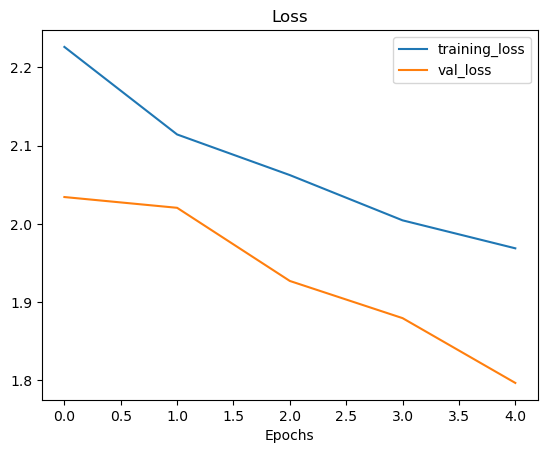

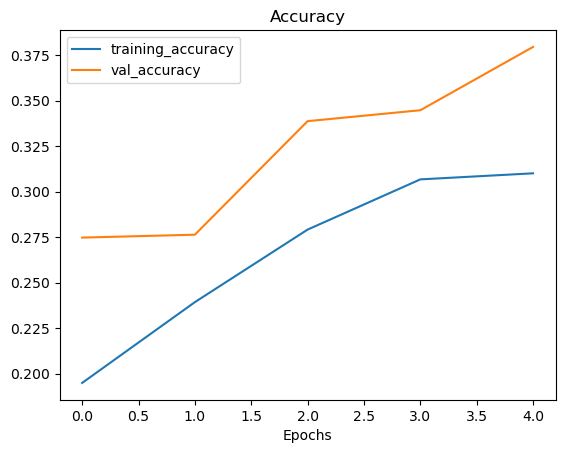

In [124]:
plot_loss_curves(history_9)

### Making Prediction

In [125]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [135]:
# Check the output of the predict function
pred = model_9.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 32ms/step


array([[0.10487712, 0.04465771, 0.05214266, 0.16457197, 0.13941397,
        0.07016451, 0.02779899, 0.09979872, 0.2382202 , 0.05835409]],
      dtype=float32)

In [136]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

In [137]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 29ms/step


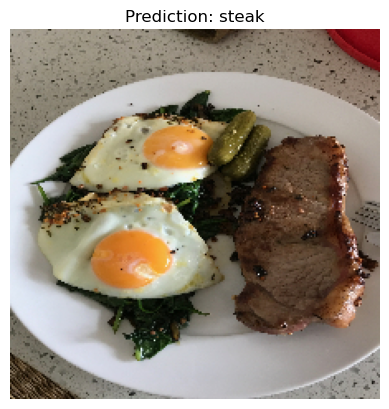

In [138]:
pred_and_plot(model_9, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 29ms/step


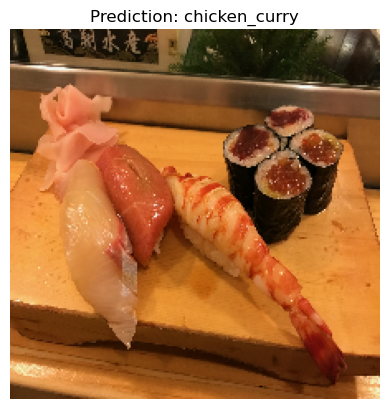

In [139]:
pred_and_plot(model_9, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 29ms/step


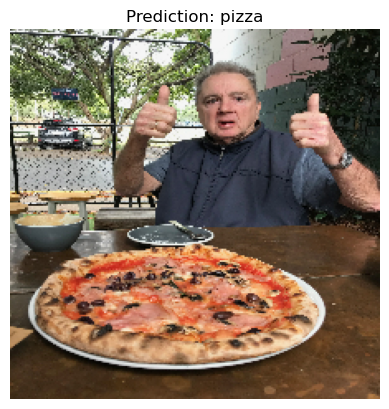

In [140]:
pred_and_plot(model_9, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 31ms/step


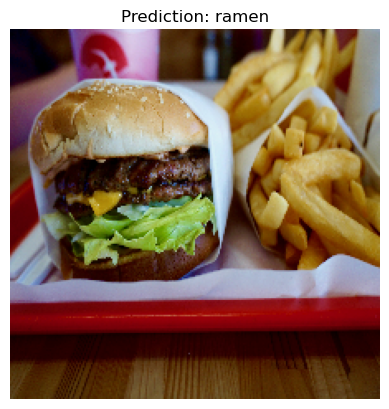

In [141]:
pred_and_plot(model_9, "03-hamburger.jpeg", class_names)

## Saving Model

* Yes our model is not good enough but if we run it for more time if will get better and converge.

In [142]:
model_9.save("saved_trained_model.h5")

In [143]:
loaded_model_9 = tf.keras.models.load_model("saved_trained_model.h5")
loaded_model_9.evaluate(test_data)

79/79 [==============================] - 16s 197ms/step - loss: 1.7969 - accuracy: 0.3796


[1.7968709468841553, 0.37959998846054077]